## Framework figure

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FixedLocator)

import sys
sys.path.insert(1, "../utils/")
import Stimuli, HH

In [135]:
figures_dir = '../figures/'

In [125]:
duration = 40

# generate stimuli
stim_params = Stimuli.ExperimentalStimParams()
e_times = Stimuli.poisson_process_duration(5, duration)
i_times = Stimuli.poisson_process_duration(15, duration)

e_times = [
    1.1,
    3.0,
    6.3,
    7.7799842743302627,
    20.0,
    21.0,
    21.486377641835695,
    23.00070004706629,
    30.3,
    33.04129836818894,
    41.59909196064346,
    43.50452420950492
]
i_times = [
    11.00070004706629,
    18.0,
    20.2,
    39.04499236398732
]

e_stims = stim_params.stim_scaffold['base']['ex']
e_stims.stim_times = e_times
i_stims = stim_params.stim_scaffold['base']['in']
i_stims.stim_times = i_times

# run sim
hh = HH.HH()
hh.add_custom_stimulus(e_stims)
hh.add_custom_stimulus(i_stims)
hh.run_simulation(duration)

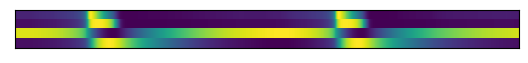

In [126]:
def standarize_column(column):
    # set column to fit in (0,1)
    column = column-np.min(column)
    column = column/np.max(column)
    return column


state_vars = np.array(
    [
        standarize_column(np.array(hh._v)), 
        standarize_column(np.array(hh._m)), 
        standarize_column(np.array(hh._h)), 
        standarize_column(np.array(hh._n))
    ]
)

plt.figure(figsize=(6.5, 0.5))
plt.imshow(state_vars, aspect='auto',interpolation='none')
plt.xticks([])
plt.yticks([])
plt.show()

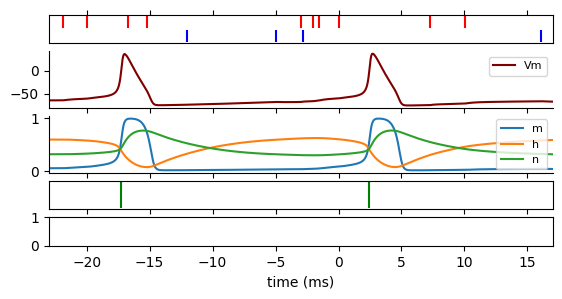

In [136]:
# plot
pivot_input = 23.00070004706629
_t = np.array(hh._t) - pivot_input

fig, axes = plt.subplots(5,1, sharex=True, gridspec_kw={'height_ratios': [1,2,2, 1, 1]}, figsize = (6.5, 3))
axes[0].vlines([t - pivot_input for t in e_times], 0.1, 0.9, color='red')
axes[0].vlines([t - pivot_input for t in i_times], -0.9, -0.1, color='blue')
axes[3].vlines([t - pivot_input for t in list(hh.spike_times)], 0.1, 0.9, color='green')
axes[1].plot(_t, hh._v, c='maroon')
axes[2].plot(_t, hh._m)
axes[2].plot(_t, hh._h)
axes[2].plot(_t, hh._n)
axes[1].legend(['Vm'], fontsize=8)
axes[2].legend(['m','h','n'], fontsize=8, loc='right')

axes[1].spines['right'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)
axes[2].spines['top'].set_visible(False)

axes[-1].set_xlim(0-pivot_input,duration-pivot_input)

axes[0].set_yticks([])
axes[0].xaxis.tick_top()


axes[3].set_yticks([])
axes[-1].set_xlabel('time (ms)')


plt.savefig(f'{figures_dir}framework_parts.svg', format='svg')

plt.show()